In [7]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import KFold
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
import patsy
import warnings

### Asignemnt 2


### Lasso (8 points)

In this assignment, you will estimate the female literacy rate in India using a LASSO model. Replicate the results from the script developed in Lab 4 in Python, R, and Julia. The data is available at CausalAI-Course/Data/Districtwise_literacy_rates.xlsx. To consult the description of each variable, please review Sheet 2 (Metadata) of the same file. You are free to select the variables you consider relevant for your models.

0.25 points → Keep only the observations with no missing values

In [11]:
df = pd.read_excel('../input/Districtwise_literacy_rates.xlsx')

In [12]:
df.isnull().sum()

STATCD       0
DISTCD       0
STATNAME     0
DISTNAME     0
DISTRICTS    0
            ..
TCH3         0
TCH4         0
TCH5         0
TCH6         0
TCH7         0
Length: 100, dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(625, 100)

In [15]:
# Eliminar columnas con solo ceros
cols_zero = df.columns[(df == 0).all()]
print("Columnas eliminadas (solo ceros):", list(cols_zero))

df = df.drop(columns=cols_zero)


Columnas eliminadas (solo ceros): ['SCH9', 'SCH9G', 'SCH9P', 'SCH9GR', 'SCH9PR']


In [16]:
df.shape

(625, 95)

In [17]:
df.head(10)

,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,CLS5,CLS6,CLS7,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7
0,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,875564.0,11.33,197001.90,...,23,852,239,2708,5205,43,70,28,1065,638
1,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,1015503.0,17.19,161871.18,...,30,1665,360,2937,5873,236,60,105,2533,964
2,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,1269751.0,98.73,155798.45,...,0,2873,40,828,3647,1159,14,0,4757,129
3,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,735753.0,11.74,150755.79,...,8,1035,325,1878,3892,250,68,19,1493,716
4,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,570060.0,13.80,97651.28,...,5,1101,209,1336,2682,113,90,38,1414,506
5,1,106,JAMMU & KASHMIR,ANANTNAG,1,12,523,1070144.0,26.04,206323.76,...,22,1592,185,2084,6182,261,74,95,2491,597
6,1,107,JAMMU & KASHMIR,LEH (LADAKH),1,6,110,147104.0,42.96,11812.45,...,17,473,0,470,1160,62,19,45,813,0
7,1,108,JAMMU & KASHMIR,KARGIL,1,7,134,143388.0,8.89,20404.11,...,3,220,99,471,1582,90,44,17,274,288
8,1,109,JAMMU & KASHMIR,DODA,1,10,388,409576.0,7.95,71020.48,...,36,766,36,1867,3010,266,41,172,1391,102
9,1,110,JAMMU & KASHMIR,UDHAMPUR,1,11,361,555357.0,19.72,82637.12,...,22,1151,6,2159,3069,811,27,118,1638,32


In [18]:
df.STATNAME.unique()

array(['JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'DELHI', 'RAJASTHAN', 'UTTAR PRADESH',
       'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH', 'NAGALAND', 'MANIPUR',
       'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM', 'WEST BENGAL',
       'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MADHYA PRADESH', 'GUJARAT',
       'DAMAN & DIU', 'DADRA & NAGAR HAVELI', 'MAHARASHTRA',
       'ANDHRA PRADESH', 'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA',
       'TAMIL NADU', 'PUDUCHERRY', 'A & N ISLANDS', 'TELANGANA'],
      dtype=object)

In [19]:
df.DISTNAME.unique()

array(['KUPWARA', 'BARAMULA', 'SRINAGAR', 'BADGAM', 'PULWAMA', 'ANANTNAG',
       'LEH (LADAKH)', 'KARGIL', 'DODA', 'UDHAMPUR', 'PUNCH', 'RAJAURI',
       'JAMMU', 'KATHUA', 'SHOPIAN', 'BANDIPORA', 'KISHTWAR', 'RAMBAN',
       'GANDERBAL', 'KULGAM', 'REASI', 'SAMBA', 'CHAMBA', 'KANGRA',
       'KULLU', 'MANDI', 'HAMIRPUR (H.P.)', 'UNA', 'BILASPUR (H.P.)',
       'SOLAN', 'SIRMAUR', 'SHIMLA', 'GURDASPUR', 'AMRITSAR',
       'KAPURTHALA', 'JALANDHAR', 'HOSHIARPUR', 'NAWANSHAHR', 'RUPNAGAR',
       'FATEHGARH SAHIB', 'LUDHIANA', 'MOGA', 'FIROZPUR', 'MUKTSAR',
       'FARIDKOT', 'BATHINDA', 'MANSA', 'SANGRUR', 'PATIALA', 'MOHALI',
       'TARAN TARAN', 'BARNALA', 'CHANDIGARH', 'UTTARKASHI', 'CHAMOLI',
       'RUDRAPRAYAG', 'TEHRI GARHWAL', 'DEHRADUN', 'GARHWAL',
       'PITHORAGARH', 'BAGESHWAR', 'ALMORA', 'CHAMPAWAT', 'NAINITAL',
       'UDHAM SINGH NAGAR', 'HARDWAR', 'PANCHKULA', 'AMBALA',
       'YAMUNANAGAR', 'KURUKSHETRA', 'KAITHAL', 'KARNAL', 'PANIPAT',
       'SONIPAT', 'JIND', 'FAT

In [20]:
# Columnas a eliminar (IDs / estructurales)
# Las elimino porque no aportan valor analítico a la predicción se tendria que convertir en 
# dummies pero hay muchas categorias y poco datos, y para VILLAGES y BLOCKS mejor esta la población total.
cols_to_drop = [
    "STATCD", 
    "DISTCD", 
    "STATNAME", 
    "DISTNAME", 
    "DISTRICTS", 
    "BLOCKS", 
    "VILLAGES"
]
df = df.drop(columns=cols_to_drop)
print("Forma después de limpiar:", df.shape)

Forma después de limpiar: (625, 88)


In [21]:
df.shape


(625, 88)

1 point → Create a histogram of the female and male literacy rate and comment briefly on its distribution.

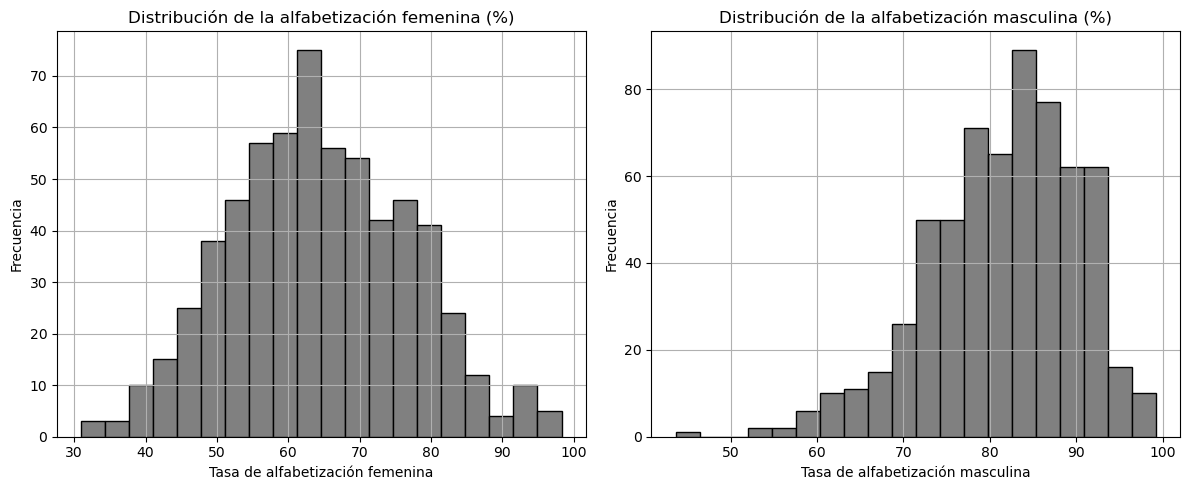

In [22]:

fig, ax = plt.subplots(1, 2, figsize=(12,5))

df['FEMALE_LIT'].hist(bins=20, ax=ax[0], color='grey', edgecolor='black')
ax[0].set_title("Distribución de la alfabetización femenina (%)")
ax[0].set_xlabel("Tasa de alfabetización femenina")
ax[0].set_ylabel("Frecuencia")

df['MALE_LIT'].hist(bins=20, ax=ax[1], color='grey', edgecolor='black')
ax[1].set_title("Distribución de la alfabetización masculina (%)")
ax[1].set_xlabel("Tasa de alfabetización masculina")
ax[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


La tasa de alfabetización femenina presenta una distribución cercana a la normal, con mayor concentración en el rango del 60% al 65%. No obstante, se observa una cola izquierda más cargada, lo que indica que existen varios distritos con tasas de alfabetización femenina bajas, por otro lado, la alfabetización masculina se concentra principalmente entre el 80% y 90%, mostrando un sesgo hacia valores más altos. Esto refleja que, en promedio, los hombres alcanzan mayores niveles de alfabetización que las mujeres, evidenciando clara disparidad de género.

In [23]:
df.drop(columns=['OVERALL_LI','MALE_LIT'], inplace=True)

In [ ]:
df.shape

(625, 86)

In [24]:
# --- Usar lista fija de 20 variables en lugar de las 20 más correlacionadas ---
vars20 = [
    "TOTPOPULAT","P_URB_POP","GROWTHRATE","SEXRATIO","AREA_SQKM",
    "SCHTOT","SCH1","SCH6","SCHTOTG","TOT_11_13_15","SCOMP5",
    "SCH1GR","SCH6GR","SCH1PR","SCH6PR",
    "ENR501","ENR506","ENR509",
    "TCH1","TCH6"
]

# Mantener compatibilidad con el resto del código: usar el mismo nombre top_vars
top_vars = [c for c in vars20 if c in df.columns]

In [25]:
formula = "0 + " + " + ".join(top_vars)
Zbase = patsy.dmatrix(formula, df, return_type="dataframe")
y = df["FEMALE_LIT"]


In [26]:
# 3) Definir X e y
X = df[top_vars]

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=123)

In [27]:
# 5) Ajustar modelo low-dimensional (OLS)
lr_base = LinearRegression().fit(X_train, y_train)

In [28]:
r2_base = 1 - np.mean((y_test - lr_base.predict(X_test))**2) / np.var(y_test)
print(f'{r2_base:.4f}')

0.4901


In [29]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
rsquares = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=cv)
print(f'{np.mean(rsquares):.4f}')

0.5161


2 points → Estimate a high-dimensional (flexible) specification: interaction terms and squared terms and compute the (R^2) on the test set

In [30]:
# Fórmula flexible con interacciones y términos cuadráticos
formula_flex = "0 + (" + " + ".join(top_vars) + ")**2"

# Construir matriz de diseño
Zflex = patsy.dmatrix(formula_flex, df, return_type='dataframe')
y = df["FEMALE_LIT"]

print("Forma de la matriz flexible:", Zflex.shape)

Forma de la matriz flexible: (625, 210)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(Zflex, y, test_size=0.25, random_state=123)

In [32]:
lr_flex = LinearRegression().fit(X_train, y_train)

In [33]:
print('Flexible model R^2 (OLS): ', f'{r2_score(y_test, lr_flex.predict(X_test)):.4f}')

Flexible model R^2 (OLS):  -28.0382


In [34]:
from sklearn.preprocessing import StandardScaler
Zflex = StandardScaler().fit_transform(Zflex)

In [36]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
rsquares = cross_val_score(LassoCV(cv=cv), Zflex, y, scoring='r2', cv=cv, n_jobs=-1)
print('Flexible model R^2 (Lasso): ', f'{np.mean(rsquares):.4f}')

Flexible model R^2 (Lasso):  0.4793


2.75 points → For λ ranging from 10,000 down to 0.001, plot the path of the number of nonzero coefficients and briefly comment on the result.

c:\Users\diego\.conda\envs\streamlit\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+04, tolerance: 7.370e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\diego\.conda\envs\streamlit\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+04, tolerance: 7.370e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\diego\.conda\envs\streamlit\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

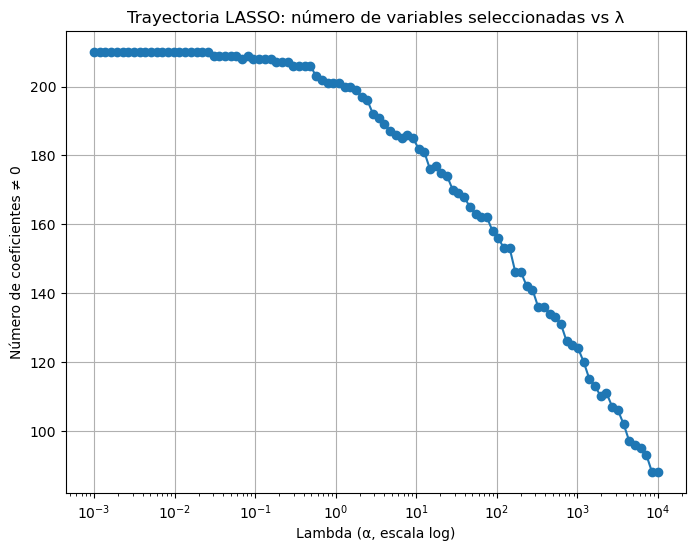

In [37]:
# Rango de lambda (alpha en sklearn)
lambdas = np.logspace(4, -3, 100)  # de 10,000 a 0.001 (log scale)

nonzero_counts = []

for lam in lambdas:
    lasso = Lasso(alpha=lam, max_iter=10000).fit(X_train, y_train)
    nonzero_counts.append(np.sum(lasso.coef_ != 0))

# Plot
plt.figure(figsize=(8,6))
plt.plot(lambdas, nonzero_counts, marker='o')
plt.xscale("log")
plt.xlabel("Lambda (α, escala log)")
plt.ylabel("Número de coeficientes ≠ 0")
plt.title("Trayectoria LASSO: número de variables seleccionadas vs λ")
plt.grid(True)
plt.show()


La trayectoria de LASSO muestra que para valores de λ muy bajos (≈0.001), casi todas las variables permanecen en el modelo. Conforme λ aumenta, el número de variables con coeficientes distintos de cero se reduce progresivamente. Para valores muy altos de λ (≈10,000), el modelo selecciona menos de 60 variables. Esto refleja cómo LASSO aplica regularización, priorizando parsimonia y evitando sobreajuste al eliminar predictores irrelevantes.